<a href="https://colab.research.google.com/github/abinandhana2007-prog/Hanggman/blob/main/AbinandhanaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor # We use Regressor for continuous target
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv("/content/video_games_sales.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
X = df.drop("Global_Sales", axis=1)
y = df["Global_Sales"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Features (X) and Labels (y) defined.")
print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Features (X) and Labels (y) defined.
Numeric Columns: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
Categorical Columns: ['Name', 'Platform', 'Genre', 'Publisher']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✔ Train-Test Split Completed!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✔ Train-Test Split Completed!
X_train shape: (13278, 10)
X_test shape: (3320, 10)
y_train shape: (13278,)
y_test shape: (3320,)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with the mean
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("✔ Preprocessing Pipeline Defined!")

✔ Preprocessing Pipeline Defined!


In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocess), # Apply preprocessing steps
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42)) # RandomForestRegressor for continuous target
])

print("✔ Model Pipeline Defined (RandomForestRegressor)!" )

✔ Model Pipeline Defined (RandomForestRegressor)!


In [ ]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


✔ Model Training Completed!



============= MODEL PERFORMANCE ===========
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.70
Root Mean Squared Error (RMSE): 0.84
R-squared (R2): 0.83



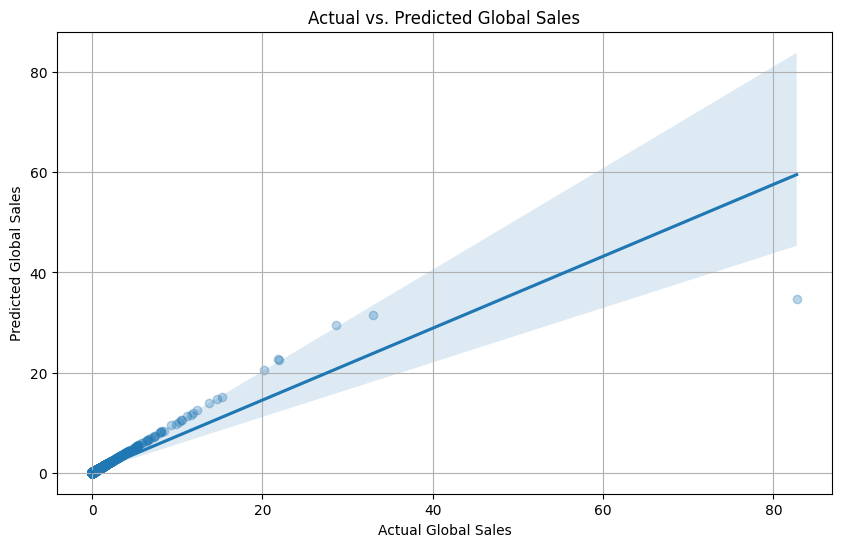

In [ ]:
y_pred = model.predict(X_test)

print("\n============= MODEL PERFORMANCE ===========")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")
print("==============================================\n")

# Plotting predictions vs actual
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.grid(True)
plt.show()